<a href="https://colab.research.google.com/github/tyra0509/jejumaster/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%9D%B4%EB%AA%85%EC%88%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국가통계포털데이터를 이용한 탐색적 데이터 분석

##** 2021년 1월과 8월 식중독 환자수 비교**
### **서울에서 식중독이 가장 많이 발생한 달은?**

국가통계포털 https://kosis.kr/index/index.do


---

(코랩)한글 폰트 지정하기

In [53]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### #라이브러리 설치 확인하기


In [1]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


### 1. 데이터 수집하기

---

In [2]:
PATH = './sample_data/'
FILE = '시도별__월별_식중독환자_현황.csv'

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [3]:
import pandas as pd

file = PATH+FILE
print(file)
df = pd.read_csv(file, encoding='utf-8')

print(type(df))
df.head()

./sample_data/시도별__월별_식중독환자_현황.csv
<class 'pandas.core.frame.DataFrame'>


,시도별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
0,시도별(1),총계,1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,시도별(1),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),...,환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명)
2,합계,11504,125,194,816,444,853,732,630,1536,...,401,417,194,343,1293,878,335,222,142,345
3,서울특별시,2142,11,95,466,55,291,54,68,172,...,62,178,10,58,8,154,-,-,20,53
4,부산광역시,637,-,3,18,52,26,68,193,224,...,51,29,43,46,595,91,22,7,6,5


### 3.데이터 전처리(가공하기)

In [4]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시도별(1)   21 non-null     object
 1   2018     21 non-null     object
 2   2018.1   21 non-null     object
 3   2018.2   21 non-null     object
 4   2018.3   21 non-null     object
 5   2018.4   21 non-null     object
 6   2018.5   21 non-null     object
 7   2018.6   21 non-null     object
 8   2018.7   21 non-null     object
 9   2018.8   21 non-null     object
 10  2018.9   21 non-null     object
 11  2018.10  21 non-null     object
 12  2018.11  21 non-null     object
 13  2018.12  21 non-null     object
 14  2019     21 non-null     object
 15  2019.1   21 non-null     object
 16  2019.2   21 non-null     object
 17  2019.3   21 non-null     object
 18  2019.4   21 non-null     object
 19  2019.5   21 non-null     object
 20  2019.6   21 non-null     object
 21  2019.7   21 non-null     object
 22  2019

In [5]:
df.describe() #기술통계함수:평균, 최고최저값 등 가지고 있는 통계함수.
            #숫자데이터만 통계를 내준다.

,시도별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
count,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
unique,20,21,12,12,15,17,16,16,16,15,...,15,14,14,16,15,15,13,10,13,14
top,시도별(1),총계,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
freq,2,1,10,9,6,5,4,6,6,7,...,6,7,7,5,6,5,8,12,9,7


In [6]:
df.columns #현재 컬럼 프린트해보고 컬럼명 변경
df.columns = ['시도별', '2018 총 환자수', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5',
       '2018.6', '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2018.12',
       '2019 총 환자수', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6',
       '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2019.12', '2020 총 환자수',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.8', '2020.9', '2020.10', '2020.11', '2020.12', '2021 총 환자수', '2021.1',
       '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7', '2021.8',
       '2021.9', '2021.10', '2021.11', '2021.12'
       ]
df.head()

,시도별,2018 총 환자수,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
0,시도별(1),총계,1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,시도별(1),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),...,환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명)
2,합계,11504,125,194,816,444,853,732,630,1536,...,401,417,194,343,1293,878,335,222,142,345
3,서울특별시,2142,11,95,466,55,291,54,68,172,...,62,178,10,58,8,154,-,-,20,53
4,부산광역시,637,-,3,18,52,26,68,193,224,...,51,29,43,46,595,91,22,7,6,5


In [7]:
#컬럼 삭제
df.drop('2018 총 환자수', axis=1, inplace=True) #행=0, 열=1
df.drop('2019 총 환자수', axis=1, inplace=True)
df.drop('2020 총 환자수', axis=1, inplace=True)
df.drop('2021 총 환자수', axis=1, inplace=True)
df.drop([0], axis=0, inplace=True)
df.drop([1], axis=0, inplace=True)
df.drop([2], axis=0, inplace=True)


In [8]:
df.head(4)

,시도별,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,11,95,466,55,291,54,68,172,770,...,62,178,10,58,8,154,-,-,20,53
4,부산광역시,-,3,18,52,26,68,193,224,34,...,51,29,43,46,595,91,22,7,6,5
5,대구광역시,-,4,-,3,-,157,69,-,10,...,-,79,15,63,33,29,-,-,-,-
6,인천광역시,15,6,3,2,5,43,67,32,105,...,-,25,-,15,-,-,29,-,14,16


In [9]:
df.columns
df.drop(['2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2018.12', '2019.1',
       '2019.2', '2019.3', '2019.4', '2019.5', '2019.6', '2019.7', '2019.8',
       '2019.9', '2019.10', '2019.11', '2019.12', '2020.1', '2020.2', '2020.3',
       '2020.4', '2020.5', '2020.6', '2020.7', '2020.8', '2020.9', '2020.10',
       '2020.11', '2020.12'], axis=1, inplace=True)

In [10]:
df.head(4)

,시도별,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,30,8,62,178,10,58,8,154,-,-,20,53
4,부산광역시,-,21,51,29,43,46,595,91,22,7,6,5
5,대구광역시,-,-,-,79,15,63,33,29,-,-,-,-
6,인천광역시,-,-,-,25,-,15,-,-,29,-,14,16


In [11]:
#결측데이터 처리
df['2021.1']= df['2021.1'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.2']= df['2021.2'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.3']= df['2021.3'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.4']= df['2021.4'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.5']= df['2021.5'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.6']= df['2021.6'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.7']= df['2021.7'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.8']= df['2021.8'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.9']= df['2021.9'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.10']= df['2021.10'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.11']= df['2021.11'].str.replace(pat=r'-',repl=r'0',regex=True)
df['2021.12']= df['2021.12'].str.replace(pat=r'-',repl=r'0',regex=True)
df

,시도별,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,30,8,62,178,10,58,8,154,0,0,20,53
4,부산광역시,0,21,51,29,43,46,595,91,22,7,6,5
5,대구광역시,0,0,0,79,15,63,33,29,0,0,0,0
6,인천광역시,0,0,0,25,0,15,0,0,29,0,14,16
7,광주광역시,2,2,0,5,4,0,16,14,4,0,0,3
8,대전광역시,0,0,7,0,0,0,0,0,0,0,0,5
9,울산광역시,0,0,0,0,0,5,0,0,0,0,0,0
10,세종특별자치시,148,0,110,0,0,0,0,0,0,0,0,0
11,경기도,50,59,67,28,54,43,421,327,76,34,2,0
12,강원특별자치도,0,12,11,6,3,26,3,59,0,0,0,150


In [12]:
# 데이터형 변환하기 : 개수(object)-->int64 형으로 변환하기
df['2021.1'] = df['2021.1'].apply('int64')
df['2021.2'] = df['2021.2'].apply('int64')
df['2021.3'] = df['2021.3'].apply('int64')
df['2021.4'] = df['2021.4'].apply('int64')
df['2021.5'] = df['2021.5'].apply('int64')
df['2021.6'] = df['2021.6'].apply('int64')
df['2021.7'] = df['2021.7'].apply('int64')
df['2021.8'] = df['2021.8'].apply('int64')
df['2021.9'] = df['2021.9'].apply('int64')
df['2021.10'] = df['2021.10'].apply('int64')
df['2021.11'] = df['2021.11'].apply('int64')
df['2021.12'] = df['2021.12'].apply('int64')
df.dtypes

시도별        object
2021.1      int64
2021.2      int64
2021.3      int64
2021.4      int64
2021.5      int64
2021.6      int64
2021.7      int64
2021.8      int64
2021.9      int64
2021.10     int64
2021.11     int64
2021.12     int64
dtype: object

###데이터 파일 저장하기

In [13]:
file = './sample_data/2021시도별__월별_식중독환자_현황.csv'
df.to_csv(file, encoding = 'CP949', mode = 'w')

In [14]:
#특정조건검색
print( '#시도별 개수: ', len( set(df['시도별']) ) )
print( '#시도별: ', set( df['시도별'] ) )

#시도별 개수:  18
#시도별:  {'전라북도', '광주광역시', '인천광역시', '세종특별자치시', '충청북도', '충청남도', '전라남도', '불명', '경기도', '부산광역시', '대구광역시', '울산광역시', '대전광역시', '경상남도', '제주특별자치도', '강원특별자치도', '경상북도', '서울특별시'}


- **특정 컬럼명 검색** : 시도별=='서울특별시' 데이터

In [15]:
df_seoul = df[df.시도별 == '서울특별시' ]
df_seoul

,시도별,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,30,8,62,178,10,58,8,154,0,0,20,53


In [16]:
df_seoul.columns= ['시도별', '1월', '2월', '3월', '4월', '5월', '6월',
       '7월', '8월', '9월', '10월', '11월', '12월']
df_seoul

,시도별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
3,서울특별시,30,8,62,178,10,58,8,154,0,0,20,53


In [17]:
df_seoul=df_seoul.transpose()
df_seoul.rename(columns=df_seoul.iloc[0], inplace=True)   # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
df_seoul= df_seoul.drop(df_seoul.index[0])
df_seoul.columns

Index(['서울특별시'], dtype='object')

In [18]:
df_seoul

,서울특별시
1월,30
2월,8
3월,62
4월,178
5월,10
6월,58
7월,8
8월,154
9월,0
10월,0


In [19]:
df_seoul=df_seoul.reset_index()
df_seoul

,index,서울특별시
0,1월,30
1,2월,8
2,3월,62
3,4월,178
4,5월,10
5,6월,58
6,7월,8
7,8월,154
8,9월,0
9,10월,0


In [20]:
df_seoul.columns=['월별', '서울특별시']
df_seoul

,월별,서울특별시
0,1월,30
1,2월,8
2,3월,62
3,4월,178
4,5월,10
5,6월,58
6,7월,8
7,8월,154
8,9월,0
9,10월,0


### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [ ]:
df.groupby(['2018.1'], as_index=False).mean()
df.groupby('2018.1').mean()

In [ ]:
df.groupby(['2018.1'], as_index=False).count()

## 4. 데이터 시각화하기

###  '서울특별시' 2021 월별 식중독 환자수를  막대 그래프로 나타내기

['NanumGothic']


<BarContainer object of 12 artists>

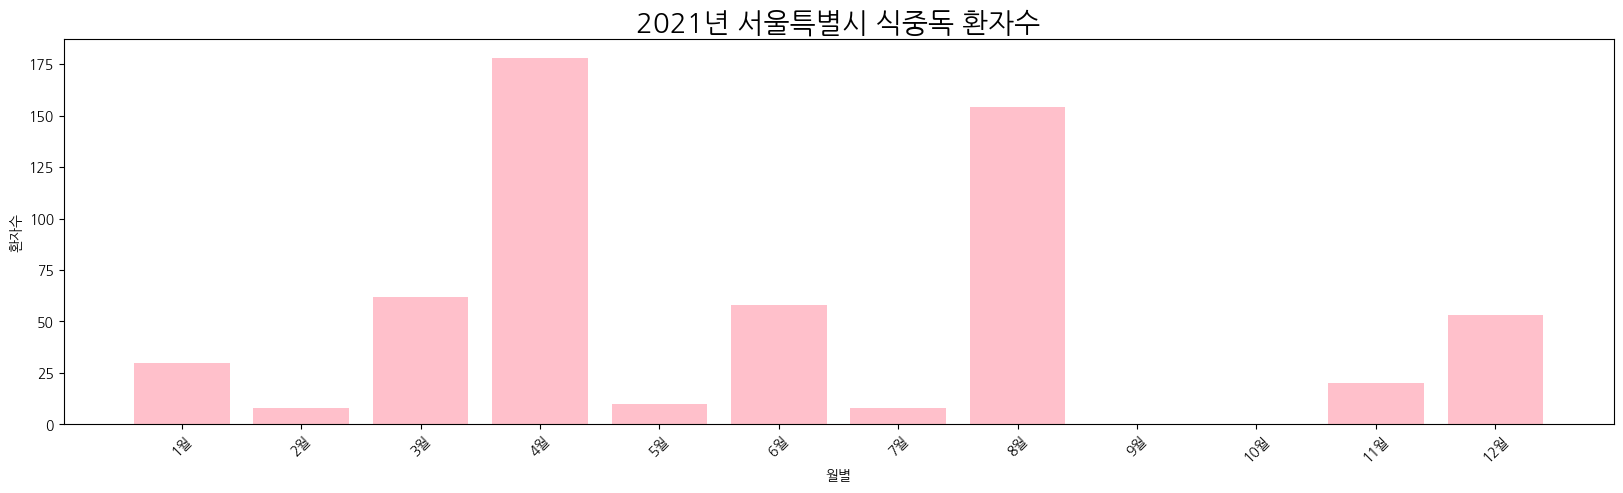

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

x = df_seoul['월별']
y = df_seoul['서울특별시']
plt.xticks(rotation=45)
# 코랩 폰트 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
plt.title('2021년 서울특별시 식중독 환자수', fontsize=20)
plt.xlabel('월별')
plt.ylabel('환자수')

plt.bar(x, y, color='pink')

In [28]:
df

,시도별,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,30,8,62,178,10,58,8,154,0,0,20,53
4,부산광역시,0,21,51,29,43,46,595,91,22,7,6,5
5,대구광역시,0,0,0,79,15,63,33,29,0,0,0,0
6,인천광역시,0,0,0,25,0,15,0,0,29,0,14,16
7,광주광역시,2,2,0,5,4,0,16,14,4,0,0,3
8,대전광역시,0,0,7,0,0,0,0,0,0,0,0,5
9,울산광역시,0,0,0,0,0,5,0,0,0,0,0,0
10,세종특별자치시,148,0,110,0,0,0,0,0,0,0,0,0
11,경기도,50,59,67,28,54,43,421,327,76,34,2,0
12,강원특별자치도,0,12,11,6,3,26,3,59,0,0,0,150


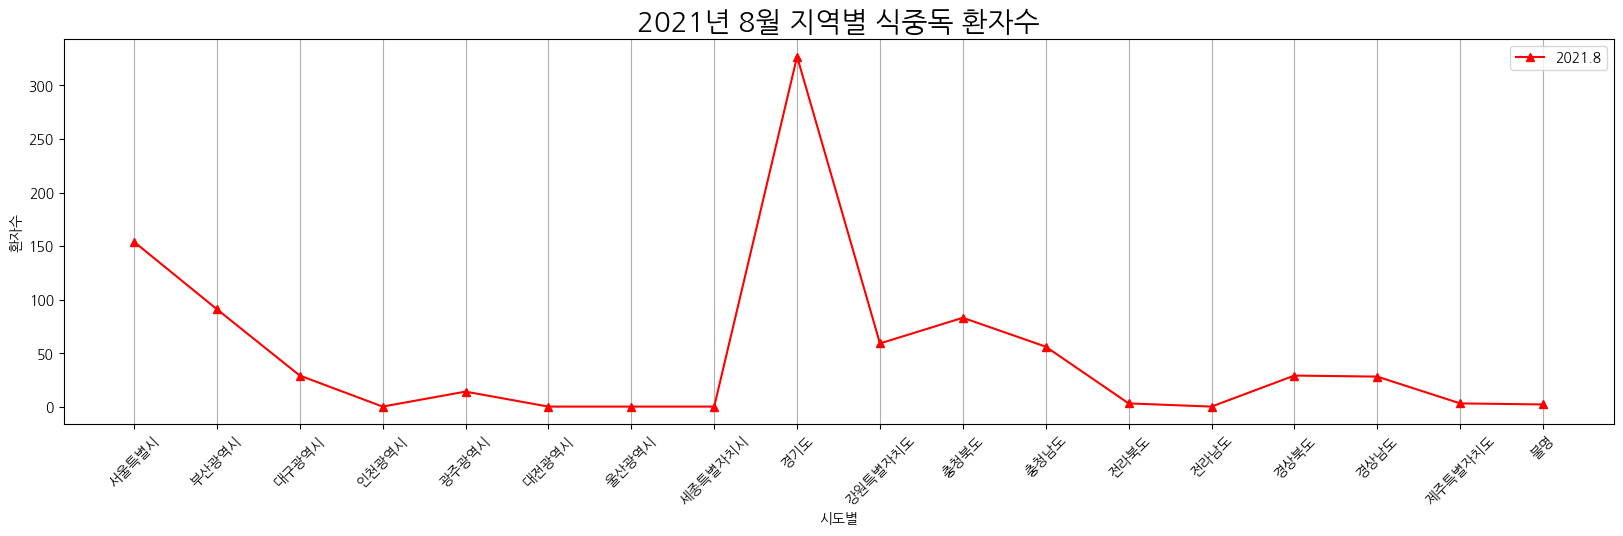

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

x = df['시도별']
y = df['2021.8']
plt.xticks(rotation=45)
# 코랩 폰트 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') # For Windows
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['axes.unicode_minus']
plt.grid(True, axis = 'y', alpha = 0.5)
plt.plot(x, y, '^', linestyle='solid', c='r', label='2021.8')
plt.title('2021년 8월 지역별 식중독 환자수', fontsize=20)
plt.xlabel('시도별')
plt.ylabel('환자수')

plt.legend()
plt.grid()
plt.show()


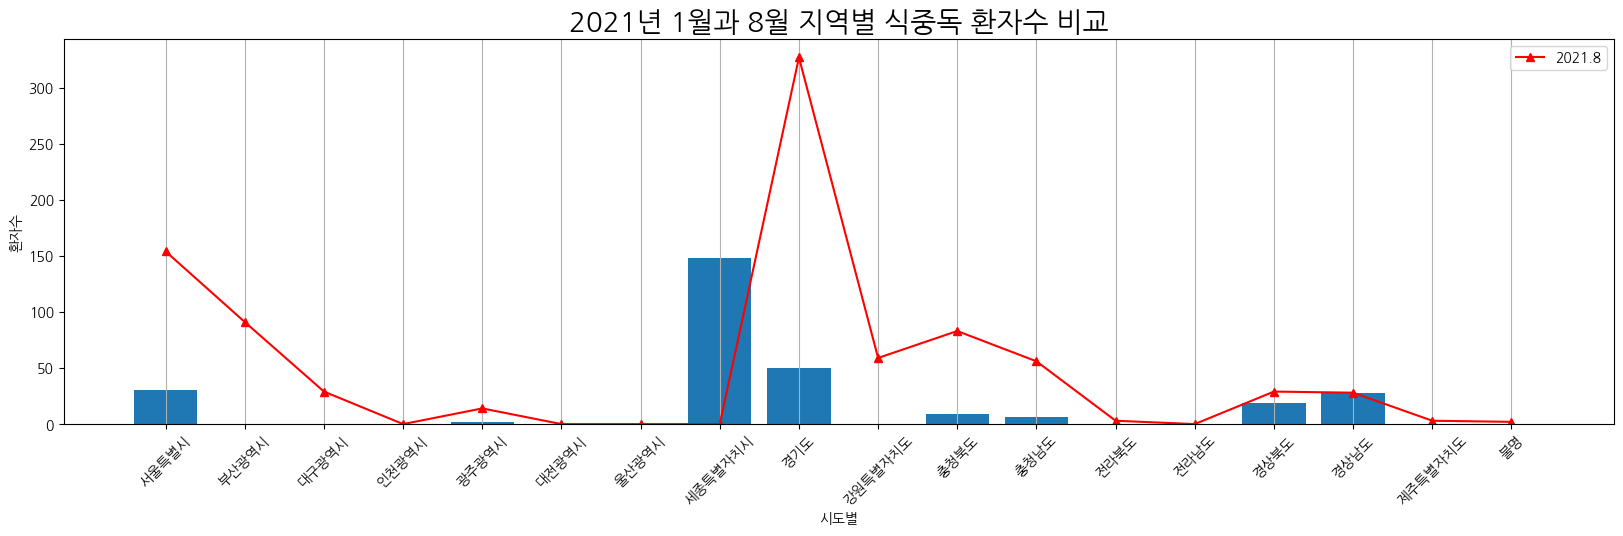

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

x = df['시도별']
y1 = df['2021.8']
y2 = df['2021.1']
plt.xticks(rotation=45)
# 코랩 폰트 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') # For Windows
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['axes.unicode_minus']
plt.grid(True, axis = 'y', alpha = 0.5)
plt.plot(x, y1, '^', linestyle='solid', c='r', label='2021.8')
plt.bar(x, y2)
plt.title('2021년 1월과 8월 지역별 식중독 환자수 비교', fontsize=20)
plt.xlabel('시도별')
plt.ylabel('환자수')

plt.legend()
plt.grid()
plt.show()


전국적으로 기온이 높은 1월보다 8월에 식중독 환자수가 눈에 띄게 많았다.
서울특별시의 경우, 기온이 높아지기 시작한 2021년 4월에 식중독 환자수가 증가했다.


-------